In [28]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggrepel)

In [29]:
color_annotation<-read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

In [30]:
df <- read.csv("02_Freq_Changes_All_Samples/FreqChanges_and_DEG_Y1D0.csv")

In [31]:
df$AIFI_L3_label <- gsub("cell", "", df$AIFI_L3)


Warning message:
“ggrepel: 58 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 64 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


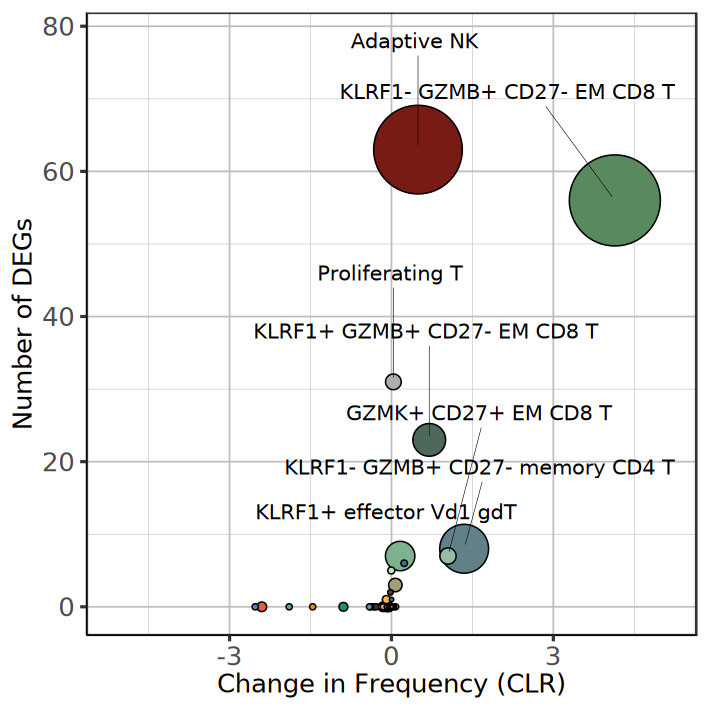

In [43]:
options(repr.plot.width = 60/25.4, repr.plot.height = 60/25.4)
df <- df %>% arrange(desc(adjP_degs_combined_value))
p <- ggplot(df, aes(x=delta_change, 
               y=DEG_Counts, 
               size=adjP_degs_combined_value, 
               fill=AIFI_L3)) +
  geom_point(shape=21, 
             stroke = 0.2,
             colour="black") +
  geom_text_repel(data= df ,
                  aes(label=AIFI_L3_label), 
                  size=1.7, 
                  nudge_y=15, 
                  segment.size = 0.05) + 
  scale_size(range = c(0.1, 10)) +
  theme_bw(base_size=6) +
  theme(axis.line = element_line(colour = "black", linewidth = 0.1), 
        panel.grid.major = element_line(colour = "grey", linewidth = 0.15),  # adjust major grid size
        panel.grid.minor = element_line(colour = "grey", linewidth = 0.05),
        legend.position = "none", 
        axis.text = element_text(size=6)) +
  scale_fill_manual(values = color_vector) +
  scale_x_continuous(limits = c(-max(abs(df$delta_change))-1, max(abs(df$delta_change))+1)) +
  xlab("Change in Frequency (CLR)") +
  ylab("Number of DEGs") 
p
ggsave('FigureA.pdf',p,width = 60/25.4,height = 60/25.4)